In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Using TensorFlow backend.


In [2]:
data = pd.read_csv('Dataset.csv',parse_dates=['Date'])
data.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost
0,2012-05-24,US-Market,secure online back up,0.0,0.0,0.00,0.00%,0.0,0.00
1,2012-05-24,US-Market,agile management software,1.0,1.2,21.22,8.20%,260.0,25.45
2,2012-05-24,US-Market,crm for financial,0.0,0.0,0.00,0.00%,0.0,0.00
3,2012-05-24,US-Market,disaster recovery planning for it,0.0,0.0,0.00,0.00%,0.0,0.00
4,2012-05-24,US-Market,tracking a vehicle,0.0,0.0,0.00,0.00%,0.0,0.00


In [3]:
data['Date'] = pd.to_datetime(data['Date'])
data.index = data['Date']
data['Weekday'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Date'] = data['Date'].dt.day
data.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost,Weekday,Month,Year
Date,,,,,,,,,,,,
2012-05-24,24,US-Market,secure online back up,0.0,0.0,0.00,0.00%,0.0,0.00,3,5,2012
2012-05-24,24,US-Market,agile management software,1.0,1.2,21.22,8.20%,260.0,25.45,3,5,2012
2012-05-24,24,US-Market,crm for financial,0.0,0.0,0.00,0.00%,0.0,0.00,3,5,2012
2012-05-24,24,US-Market,disaster recovery planning for it,0.0,0.0,0.00,0.00%,0.0,0.00,3,5,2012
2012-05-24,24,US-Market,tracking a vehicle,0.0,0.0,0.00,0.00%,0.0,0.00,3,5,2012


In [4]:
data = data.dropna()
data.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost,Weekday,Month,Year
Date,,,,,,,,,,,,
2012-05-24,24,US-Market,secure online back up,0.0,0.0,0.00,0.00%,0.0,0.00,3,5,2012
2012-05-24,24,US-Market,agile management software,1.0,1.2,21.22,8.20%,260.0,25.45,3,5,2012
2012-05-24,24,US-Market,crm for financial,0.0,0.0,0.00,0.00%,0.0,0.00,3,5,2012
2012-05-24,24,US-Market,disaster recovery planning for it,0.0,0.0,0.00,0.00%,0.0,0.00,3,5,2012
2012-05-24,24,US-Market,tracking a vehicle,0.0,0.0,0.00,0.00%,0.0,0.00,3,5,2012


In [5]:
data.describe()

,Date,Average.Position,CPC,Clicks,Impressions,Cost,Weekday,Month,Year
count,352540.000000,352540.000000,352540.000000,352540.000000,3.525400e+05,352540.000000,352540.000000,352540.000000,352540.000000
mean,15.943309,0.611163,14.287964,220.299838,9.758862e+03,1900.441204,3.016217,8.003140,2012.188929
std,9.088969,0.644052,37.882436,1719.222177,7.145521e+04,10060.075649,1.964876,3.645515,0.391453
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,2012.000000
25%,8.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,7.000000,2012.000000
50%,16.000000,1.000000,1.080000,2.090000,1.270000e+02,7.930000,3.000000,9.000000,2012.000000
75%,24.000000,1.000000,12.070000,34.870000,1.553000e+03,369.810000,5.000000,11.000000,2012.000000
max,31.000000,12.000000,632.730000,89233.580000,3.666042e+06,285716.050000,6.000000,12.000000,2013.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 352540 entries, 2012-05-24 to 2013-02-12
Data columns (total 12 columns):
Date                352540 non-null int64
Market              352540 non-null object
Keyword             352540 non-null object
Average.Position    352540 non-null float64
CPC                 352540 non-null float64
Clicks              352540 non-null float64
CTR                 352540 non-null object
Impressions         352540 non-null float64
Cost                352540 non-null float64
Weekday             352540 non-null int64
Month               352540 non-null int64
Year                352540 non-null int64
dtypes: float64(5), int64(4), object(3)
memory usage: 35.0+ MB


In [7]:
(data['Clicks'].value_counts()/len(data)).head()

0.00    0.425892
0.01    0.001407
0.02    0.000780
0.40    0.000550
0.34    0.000545
Name: Clicks, dtype: float64

In [8]:
data['CTR'] = data['CTR'].str.replace('%','')
data.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost,Weekday,Month,Year
Date,,,,,,,,,,,,
2012-05-24,24,US-Market,secure online back up,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012
2012-05-24,24,US-Market,agile management software,1.0,1.2,21.22,8.20,260.0,25.45,3,5,2012
2012-05-24,24,US-Market,crm for financial,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012
2012-05-24,24,US-Market,disaster recovery planning for it,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012
2012-05-24,24,US-Market,tracking a vehicle,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012


In [9]:
data.corr()

,Date,Average.Position,CPC,Clicks,Impressions,Cost,Weekday,Month,Year
Date,1.000000,-0.045487,-0.075048,0.006837,0.001369,0.008768,0.002632,0.061559,-0.112233
Average.Position,-0.045487,1.000000,0.461401,0.078113,0.086770,0.116628,-0.001666,-0.005807,0.013980
CPC,-0.075048,0.461401,1.000000,-0.019150,-0.011769,0.084720,-0.008716,0.037728,-0.038139
Clicks,0.006837,0.078113,-0.019150,1.000000,0.816323,0.538378,0.001741,-0.018717,-0.007430
Impressions,0.001369,0.086770,-0.011769,0.816323,1.000000,0.483195,0.000519,-0.000360,-0.009645
Cost,0.008768,0.116628,0.084720,0.538378,0.483195,1.000000,0.000412,-0.014670,0.009709
Weekday,0.002632,-0.001666,-0.008716,0.001741,0.000519,0.000412,1.000000,0.039095,-0.039383
Month,0.061559,-0.005807,0.037728,-0.018717,-0.000360,-0.014670,0.039095,1.000000,-0.898586
Year,-0.112233,0.013980,-0.038139,-0.007430,-0.009645,0.009709,-0.039383,-0.898586,1.000000


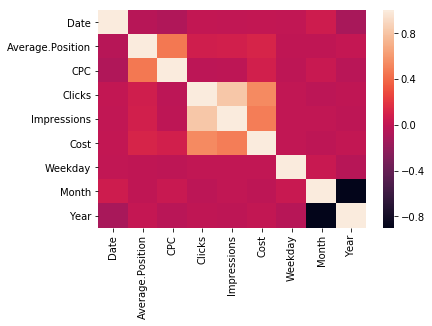

In [10]:
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [11]:
print("checking if any null values are present\n", data.isna().sum())

checking if any null values are present
 Date                0
Market              0
Keyword             0
Average.Position    0
CPC                 0
Clicks              0
CTR                 0
Impressions         0
Cost                0
Weekday             0
Month               0
Year                0
dtype: int64


/home/saeed/miniconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


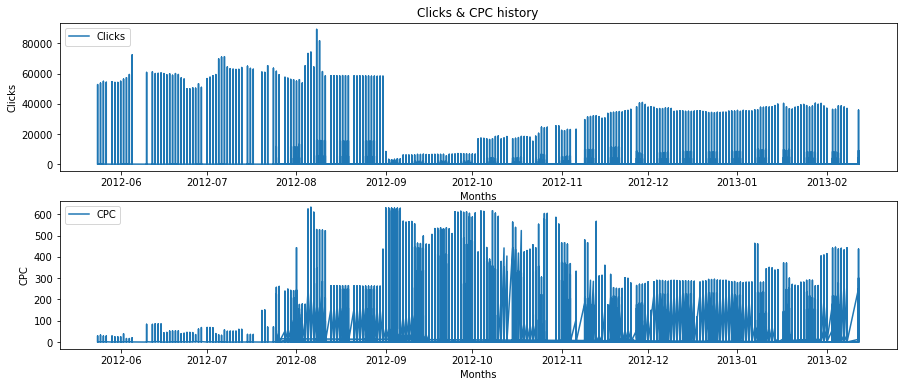

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(data["Clicks"])
plt.title('Clicks & CPC history')
plt.ylabel('Clicks')
plt.xlabel('Months')
plt.legend(['Clicks'], loc='upper left')

plt.subplot(2,1,2)
print('\n')

plt.plot(data["CPC"])
plt.ylabel('CPC')
plt.xlabel('Months')
plt.legend(['CPC'], loc='upper left')

plt.show()

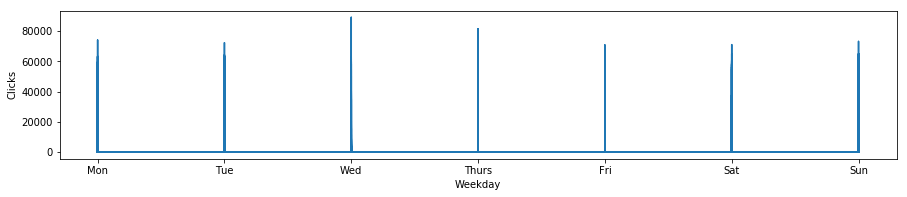

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.ylabel('Clicks')
plt.xlabel('Weekday')
plt.xticks([0,1,2,3,4,5,6],labels=['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])
plt.plot(data['Weekday'],data['Clicks'])

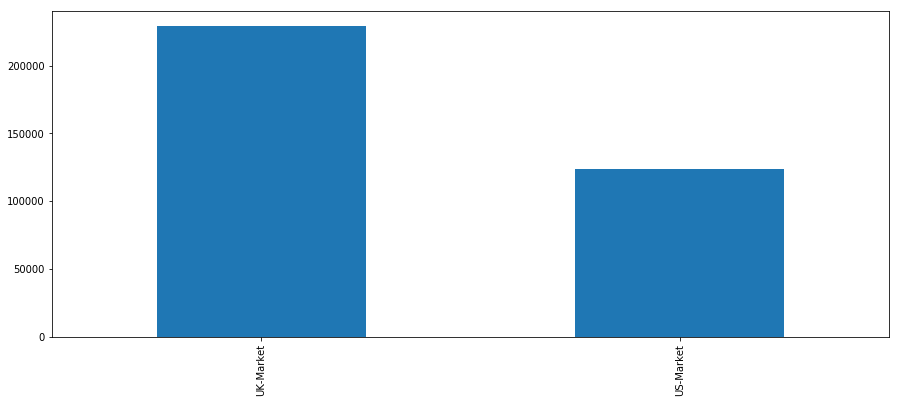

In [14]:
plt.subplots(figsize=(15,6))
data.Market.value_counts().plot(kind='bar')
plt.xticks([1,0],labels=['US-Market','UK-Market'])
plt.show()

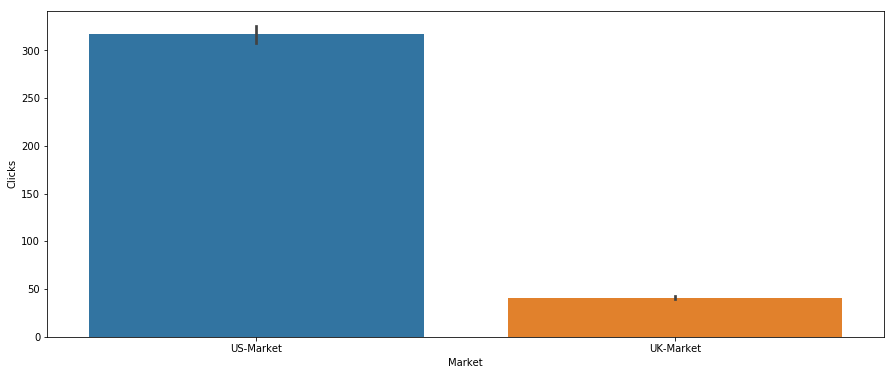

In [15]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Market", y="Clicks", data=data)
plt.show()

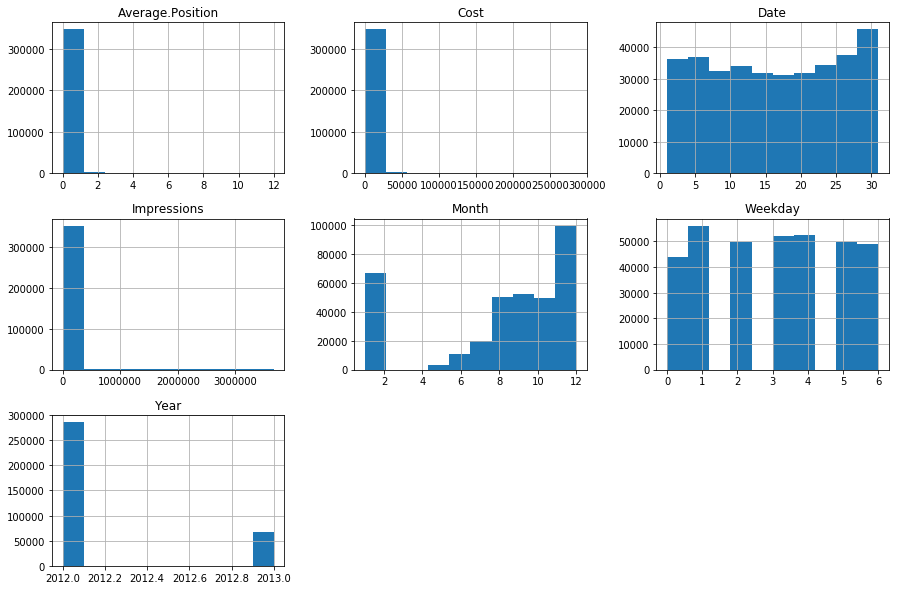

In [16]:
features = data.drop(['CPC','Clicks'],axis=1)
target = data[['CPC','Clicks']]

features.hist(figsize=(15,10))
plt.show()

In [17]:
data['Keyword'] = data['Keyword'].values.astype('U')
data['Market']= data['Market'].astype('category')
data['Market'] = data['Market'].cat.codes
data.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost,Weekday,Month,Year
Date,,,,,,,,,,,,
2012-05-24,24,1,secure online back up,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012
2012-05-24,24,1,agile management software,1.0,1.2,21.22,8.20,260.0,25.45,3,5,2012
2012-05-24,24,1,crm for financial,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012
2012-05-24,24,1,disaster recovery planning for it,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012
2012-05-24,24,1,tracking a vehicle,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012


In [18]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

stop_words = r'\b(?:{})\b'.format('|'.join(stop))
data['Keyword'] = data['Keyword'].str.replace(stop_words, '')
data['Keyword'] = data['Keyword'].str.replace(r'\s+', ' ')
data.head()

,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost,Weekday,Month,Year
Date,,,,,,,,,,,,
2012-05-24,24,1,secure online back,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012
2012-05-24,24,1,agile management software,1.0,1.2,21.22,8.20,260.0,25.45,3,5,2012
2012-05-24,24,1,crm financial,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012
2012-05-24,24,1,disaster recovery planning,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012
2012-05-24,24,1,tracking vehicle,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012


In [19]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [wordnet_lem.lemmatize(token, pos="v") for token in tokens]
    return ' '.join(stemmed_tokens)

data['Keyword'] = data['Keyword'].apply(stem_sentences)
data.head()

[nltk_data] Downloading package wordnet to /home/saeed/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Date,Market,Keyword,Average.Position,CPC,Clicks,CTR,Impressions,Cost,Weekday,Month,Year
Date,,,,,,,,,,,,
2012-05-24,24,1,secure online back,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012
2012-05-24,24,1,agile management software,1.0,1.2,21.22,8.20,260.0,25.45,3,5,2012
2012-05-24,24,1,crm financial,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012
2012-05-24,24,1,disaster recovery plan,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012
2012-05-24,24,1,track vehicle,0.0,0.0,0.00,0.00,0.0,0.00,3,5,2012


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(n_features=20)

vector = vectorizer.transform(data['Keyword'])
data['Keyword'] = vector.toarray()

X = data.drop(['CPC','Clicks'],axis=1)
y = data[['CPC','Clicks']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [21]:
from sklearn.ensemble import RandomForestRegressor 

rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt

y_pred1 = rf_regressor.predict(X_test)
print(mean_absolute_error(y_test,y_pred1))
print(sqrt(mean_squared_error(y_test,y_pred1)))
print(r2_score(y_test,y_pred1))

3.0096855941536598
89.55480687834894
0.9653141524356799
